## Are biographic and matric info good indicators for varsity performance?

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [130]:
matricYears = pd.read_csv('C:/Users/Billionaire/Documents/2019-MASTERS/MAIN/EDUCATION/DATA/WORKING/matricYears.csv')

# Me - Experiment

In [5]:
me = matricYears[matricYears['student_number'] == 1043377]

In [6]:
meMatric = me.drop_duplicates(subset = ['test_segment_desc']).iloc[:,:-2]

In [7]:
meVarsity = me.drop_duplicates(subset = ['unit_title'])

In [8]:
meVarsity = meVarsity.loc[:, ['student_number','unit_title']]
meVarsity = meVarsity.rename(mapper = {'unit_title': 'test_segment_desc', 'unit_latest_mark': 'test_segment_percentile'}, axis = 1)

# Other People - the rest

In [131]:
dfMatric = matricYears.drop_duplicates(subset = ['student_number', 'test_segment_name', 'test_segment_percentile'])

In [132]:
dfMatric = dfMatric.loc[:, ['student_number', 'test_segment_name', 'test_segment_desc', 'test_segment_percentile']]

In [133]:
dfMatric = dfMatric.drop('test_segment_desc', axis = 1)

In [134]:
dfVarsity = matricYears.drop_duplicates(subset = ['student_number', 'unit_title'])

In [135]:
dfVarsity = dfVarsity.loc[:, ['student_number', 'unit_cd', 'unit_latest_mark']]
dfVarsity = dfVarsity.rename(mapper = {'unit_cd': 'test_segment_name', 'unit_latest_mark': 'test_segment_percentile'}, axis = 1)

In [136]:
dfMatricVarsity = pd.concat([dfMatric,dfVarsity], axis = 0)

In [137]:
# dfMatricVarsity = dfMatricVarsity.drop('test_segment_desc', axis = 1)
# dfMatricVarsity = dfMatricVarsity.drop('unit_cd', axis = 1)

### <span style="color:black"> Make `test_segment_percentile` numeric </span>

In [139]:
dfMatricVarsity['test_segment_percentile'] = dfMatricVarsity['test_segment_percentile'].str.replace(',', '.', regex = False)
dfMatricVarsity['test_segment_percentile'] = pd.to_numeric(dfMatricVarsity['test_segment_percentile'])

### Make `test_segment_percentile` numeric <span style="color:magenta"> DONE </span> 

In [17]:
#coms - RANDOM
coms = dfMatricVarsity[dfMatricVarsity['test_segment_name'].str.contains('COMS', na = False)]
coms[coms['test_segment_percentile'] >= 85].sort_values('test_segment_percentile', ascending = False)

,student_number,test_segment_name,test_segment_percentile
610067,783135,COMS1017,102.0
610070,783135,COMS1016,100.0
520747,705668,COMS1018,100.0
157922,1386161,COMS1017,100.0
292901,1662476,COMS1018,100.0
653531,818232,COMS2013,100.0
699679,873666,COMS1018,100.0
610097,783135,COMS2012,100.0
610091,783135,COMS2013,100.0
378509,444640,COMS3003,100.0


### <span style="color:black"> Create table with student number as index and subjects as columns with marks per subject as entries </span>

In [140]:
#remove grade if grade <20 - may have dropped
dfMatricVarsity = dfMatricVarsity[dfMatricVarsity.test_segment_percentile > 0]

In [141]:
testSegmentPercentiles = dfMatricVarsity['test_segment_percentile']

In [28]:
nnaDict = list(zip(nna.test_segment_name, nna.test_segment_percentile))

NameError: name 'nna' is not defined

### I want to have an array that has student number as index and the subjects as column values 
1) Make student numbers array

2) create array of unique subjects - test_segment_names (about 1,165 entries)

3) then we will map each student number with observations in each column

In [142]:
#create unique test_segment_names
testSegmentNames = dfMatricVarsity['test_segment_name'].unique()

In [143]:
studentNumbers = dfMatricVarsity.student_number.unique()
subjectMarks =[]
for i in studentNumbers:
    subjectMark = dict(np.insert(dfMatricVarsity[dfMatricVarsity['student_number'] == i].values[:,[1,2]], 0,['student_number',i], axis = 0))
    subjectMarks.append(subjectMark)

In [144]:
dfSubjectMarks = pd.DataFrame(data = subjectMarks, columns = testSegmentNames, index = studentNumbers)

In [145]:
dfSubjectMarks

,SWANSC,LSCNSC,LFONSC,PSCNSC,MATNSC,ENBNSC,GEGNSC,ENANSC,ACTNSC,AFBNSC,...,ARCL3001,STAT5030,ARCL7027A,COMS7045A,MCBG4026A,STAT7037,STAT7038,STAT7035,STAT7032,CHEM3007
1006119,80.0,81.0,85.0,92.0,79.0,71.0,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007740,NaN,66.0,82.0,58.0,63.0,NaN,NaN,70.0,73.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008895,NaN,83.0,80.0,80.0,78.0,NaN,NaN,70.0,NaN,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010534,NaN,NaN,93.0,96.0,99.0,75.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010718,NaN,77.0,91.0,71.0,70.0,NaN,NaN,73.0,70.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011560,NaN,89.0,89.0,94.0,92.0,71.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012619,NaN,63.0,86.0,51.0,67.0,65.0,77.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013380,NaN,NaN,87.0,70.0,88.0,NaN,NaN,86.0,84.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014233,NaN,72.0,NaN,61.0,72.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015561,NaN,71.0,80.0,78.0,64.0,NaN,NaN,72.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# fig, ax = plt.subplots(figsize = (20,20))

# sns.pairplot(a)

### Cluster subject marks (high school and varsity) using kmeans

In [120]:
from sklearn.cluster import KMeans
from sklearn import cluster

n_clusters = 10
np.random.seed(0)
# reshapes from (768,1024) to (786432,1)
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(dfSubjectMarks.fillna(0))
k_means.labels_

Join `dfSubjectMarks` and `dfSubjectMarksLabels`

In [127]:
dfSubjectMarksLabels = dfSubjectMarks.copy()
dfSubjectMarksLabels['labels'] = k_means.labels_

In [148]:
dfSubjectMarksLabels

,SWANSC,LSCNSC,LFONSC,PSCNSC,MATNSC,ENBNSC,GEGNSC,ENANSC,ACTNSC,AFBNSC,TOUNSC,ELTNSC,TSANSC,EGDNSC,SSANSC,CATNSC,IZANSC,INTNSC,AFCNSC,MCTNSC,MP3NSC,AGSNSC,BUSNSC,STANSC,DRANSC,FRCNSC,SEANSC,IZBNSC,APMNSC,INANSC,APENSC,HISNSC,MGRNSC,XTANSC,VISNSC,STBNSC,ECONSC,IXANSC,SEBNSC,MALNSC,ARCNSC,COSNSC,AFANSC,DESNSC,ITCNSC,RLSNSC,HECNSC,MUSNSC,LACNSC,POCNSC,CVTNSC,HICNSC,TCBNSC,SWBNSC,DASNSC,SSBNSC,GUCNSC,CHINSC,XTBNSC,ENCNSC,APANSC,RSDNSC,RSFNSC,TCHNSC,URBNSC,IXBNSC,MRENSC,AMPNSC,HOSNSC,SPENSC,GRCNSC,TSBNSC,SSCNSC,SPCNSC,TACNSC,NSCNSC,INBNSC,AGGREGATE,ADMNSC,GRANSC,POBNSC,AGTNSC,UNBNSC,TCANSC,TCCNSC,IXCNSC,CHEM3028,CHEM2003,MATH2011,MCBG2032,MCBG2031,MCBG2029,MATH1010,BIOL1000,PHYS1001,CHEM1012,COMS1018,COMS1015,MATH1034,PHYS1000,MATH1036,MATH1014,MATH2014,PHYS1014,PHYS1015,CHEM1033,BIOL1006,MATH2016,MATH2019,MATH2015,MATH2007,STAT2012,MATH2001,APPM2007,APPM3017,APPM1006,MATH2021,PHYS2001,GEOL2016,MATH2003,GEOL1000,GEOL3022,GEOL3037,PHYS2002,GEOL2008,MCBG3004,STAT1000,COMS1016,COMS1017,PHYS2007,COMS2004,MCBG2036,MCBG2033,STAT1005,MATH3004,MATH3032,PHYS1026,MATH3001,MATH3034,MATH3006,APPM4069A,APPM4057A,MATH3003,APPM4070A,APPM4074A,APPM4065A,APPM4073A,APPM4068A,STAT2005,STAT1003,STAT2008,STAT3008,STAT1002,APES3071,MCBG3017,APES2008,APES2022,APES2005,APES2015,PHYS1027,MATH3031,MATH4021A,MATH4026A,MATH4017A,MATH4023A,MATH4027A,MATH4019A,MATH4016A,MATH4025A,MATH4022A,MATH3010,MATH3009,CHEM3034,CHEM3033,MATH2012,MATH2022,MCBG3011,MCBG5009,MCBG5016,MCBG3033,APPM1021,COMS3005,COMS3007,COMS3003,COMS2001,COMS2014,COMS2013,COMS2002,COMS2015,COMS3002,COMS3006,STAT3017,MATH3025,APES3052,APES3048,APES3047,APES3062,APES3066,APES3067,APES3028,APES3065,APES2037,APES2036,APES2035,APES2034,APES2033,CHEM2002,CHEM3003,CHEM3002,GEOG1000,CHEM2001,MCBG2028,COMS3009,COMS4032A,COMS4036A,COMS4045A,COMS4044A,COMS4042A,APPM4058A,COMS4030A,COMS4040A,APES3051,APES3064,APES2031,APES3058,APES3041,GEOG3024,GEOG4038A,GEOG4034A,GEOG4032A,GEOG4015A,GEOG4033A,GEOG2014,GEOG2010,GEOG2013,GEOG3021,GEOG2011,GEOG3017,GEOG3020,APES3044,APES2012,APES4034A,APES3042,APES4018A,APES4020A,APES4021A,APES4030A,COMS3008,APPM1004,APES3069,...,MATH4023,STAT7006A,STAT7064A,STAT7063A,GEOG7044A,GEOG7029A,GEOG7045A,GEOL3020,GEOG4023,GEOG4009,GEOG4001,GEOG4022,STAT4100,PHYS4017,APES4009,MATH4000,GEOL7027,GEOL7029,GEOL7023,GEOL7026,GEOL7022,GEOL7024,APES7004,APES7018,APES2023,APES2000,GEOG4035,PALP4003,COMS7059A,APES4003,APPM5007,GEOG7044,GEOG7029,GEOG7045,GEOG7011,APES2006,PHYS4021,GEOL7051,GEOL7025,PHYS4028,APES4015,PALP4018,PALP4014,PALP4011,PALP4019,PALP4015,PALP4016,PALP4010,PALP4012,PALP4023,MCBG5013,MCBG3014,MCBG3029,MCBG5012,MCBG5014,MCBG4026,APPM4062,STAT4099,STAT4096,GEOP4000,MATH4017,APPM4046,PALP4020A,PALP4010A,PALP4024A,PALP4017A,PALP4014A,PALP4012A,PALP4011A,PALP4018A,PALP4016A,APES3038,APES2011,COMS4034,MATH2020,GEOL7026A,GEOL7027A,GEOL7023A,GEOL7029A,STAT5031,APPM4073,APPM4067,APPM4070,APPM4068,APPM4071,MCBG4021,COMS2003,GEOL7024A,COMS4039,COMS4041,STAT7062,GEOG7000,ARCL4012,ARCL4010,STAT4084,APES4018,APES4024,APES4019,PALP4020,PALP4013,PALP4017,GEOG4041,MCBG4024,APES4022,PHYS4025,PHYS4013,PHYS4024,GEOG4015,APES3061,APES3055,GEOL2017,GEOL7030A,MATH5005,MATH5010,MATH5002,GEOL4006,ARCL4013,ARCL3000,ARCL4009,APES4032,MCBG3010,COMS4037A,MCBG5003,APES4029,GEOL7025A,GEOL7022A,GEOL7031A,ARCL4021,GEOL7041A,GEOL7034A,GEOL7038A,GEOL7032A,GEOL7033A,GEOL7028A,APES7003,GEOG4004,GEOG4025,GEOG7000A,PHYS4023,MCBG3012,MCBG3022,MCBG3021,MCBG3027,GEOL7028,ARCL4022,APES3039,STAT3028,APES3063,PHYS7057,PHYS7055,PHYS7056,PHYS7059,PHYS7053,PHYS7054,PHYS7062,PHYS7058,PHYS7060,PHYS7061,PHYS7052,ARCL4026,ARCL4017,MCBG3030,GEOG4019,MATH3033,ARCL4017A,ARCL4018A,STAT4104,APES3026,APES3021,PHYS7061A,PHYS7058A,PHYS7054A,PHYS7057A,PHYS7056A,PHYS7062A,GEOL4024,GEOL4023,GEOL4022,PALP4021,ARCL4018,APES4014,ARCL4020,STAT4013A,STAT4108,STAT4109,STAT4038,BIOL1025,STAT7038A,STAT7033A,STAT7030A,ARCL4024,ARCL4023,MCBG4025A,PALP4019A,COMS7043A,PHYS4025A,ARCL4022A,ARCL4024A,PALP4013A,PALP4026A,MCBG3005,MCBG3009,APPM7034A

### visualise clusters in n dimensions

In [29]:
allCorrSubjectMarks = dfSubjectMarks.corr(method='pearson')

### Want to calc correlation between hs and university subjects (not including hs and hs)

In [121]:
mathCorr = dict(corrSubjectMarks['MATNSC'])

In [122]:
# return k:v for tuple (k,v) from the array of tuples dictCorr.items() if the value > .5 
mathCorr5 = {k: v for k, v in dictCorr.items() if v > .5}

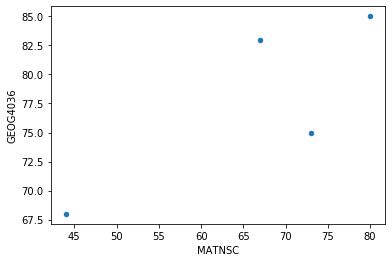

In [106]:
dfSubjectMarks.plot(kind = 'scatter', x = 'MATNSC', y = 'GEOG4036')

In [146]:
dfSubjectMarks

,SWANSC,LSCNSC,LFONSC,PSCNSC,MATNSC,ENBNSC,GEGNSC,ENANSC,ACTNSC,AFBNSC,...,ARCL3001,STAT5030,ARCL7027A,COMS7045A,MCBG4026A,STAT7037,STAT7038,STAT7035,STAT7032,CHEM3007
1006119,80.0,81.0,85.0,92.0,79.0,71.0,63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007740,NaN,66.0,82.0,58.0,63.0,NaN,NaN,70.0,73.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008895,NaN,83.0,80.0,80.0,78.0,NaN,NaN,70.0,NaN,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010534,NaN,NaN,93.0,96.0,99.0,75.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010718,NaN,77.0,91.0,71.0,70.0,NaN,NaN,73.0,70.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011560,NaN,89.0,89.0,94.0,92.0,71.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012619,NaN,63.0,86.0,51.0,67.0,65.0,77.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013380,NaN,NaN,87.0,70.0,88.0,NaN,NaN,86.0,84.0,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1014233,NaN,72.0,NaN,61.0,72.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1015561,NaN,71.0,80.0,78.0,64.0,NaN,NaN,72.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
X = 
df = pd.DataFrame(X)
# ensure all values are positive (this is needed for our customer 360 use-case)
df = df.abs()
# rename X columns
df = rename_columns(df)
# and add the Y
df['y'] = Y

# split df into cluster groups
grouped = df.groupby(['y'], sort=True)

# compute sums for every column in every group
sums = grouped.sum()
# sums

In [117]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
0,270.442113,1769.929472,1863.756801,3.170119,4842.180881,1034.859199,2619.572686,3560.908744,1482.799496,3414.849361,1778.366204,1431.560843,0
1,955.532925,2346.295251,2369.640465,3733.628863,2205.831545,2342.127328,1681.815567,653.414959,3750.372660,3353.051296,1058.571783,1754.058421,0
2,1502.312490,3494.943983,3660.100772,1409.142737,1506.230815,2458.644740,1431.685330,548.620309,2138.137904,1734.270235,115.493860,2495.251514,0
3,3533.577757,600.571563,209.184571,664.357697,643.741480,333.153897,888.244463,428.787643,142.623107,410.006797,4384.216130,1094.551971,1
4,170.234145,425.747011,1246.514898,4383.649297,2781.740864,1082.006397,3688.489244,4855.297836,431.707733,153.980563,2245.072044,2664.108170,0
5,1799.678725,801.221842,4611.399450,4893.633523,1246.089993,439.295044,701.628658,3286.290090,2692.148562,1939.931842,729.117865,106.498464,0
6,2185.558983,598.168283,722.354315,259.205824,1603.717823,441.870477,1259.633459,994.639627,893.775779,275.839175,1007.783382,526.951722,0
7,3087.869055,5014.960782,32.574787,4217.344635,5625.290632,370.754915,1302.458496,5081.648999,2277.667620,2291.163845,5864.778658,1972.905121,3
8,1277.615754,352.380235,782.327932,1313.224760,4689.319376,351.101493,912.934937,3582.475345,3486.029341,2008.002428,3265.563009,1920.898666,0
9,1124.077959,2565.908755,3245.930749,4723.957092,7696.311001,1178.208944,2166.173421,2529.089455,4104.730857,652.026317,266.909954,2620.338459,3


### The intuition: everyone who studied column x and is in group K = k, what was the average of all their grades?

### Transpose `dfMatric` dataframe cause we want to work only with Matric marks

In [161]:
matric_test_segment_names = dfMatric['test_segment_name'].unique()
studentNumbers = dfMatric.student_number.unique()
matric_subject_marks =[]
for i in studentNumbers:
    subjectMark = dict(np.insert(dfMatric[dfMatric['student_number'] == i].values[:,[1,2]], 0,['student_number',i], axis = 0))
    matric_subject_marks.append(subjectMark)

In [198]:
df_matric_subject_marks =  pd.DataFrame(data = matric_subject_marks, columns = matric_test_segment_names, index = studentNumbers)

In [199]:
df_matric_subject_marks = df_matric_subject_marks.replace(',', '.', regex = True)
df_matric_subject_marks = df_matric_subject_marks.apply(pd.to_numeric)

## Mean average of marks

In [200]:
df_matric_subject_marks['MeanAverage'] = df_matric_subject_marks.mean(axis=1)

# Kmeans

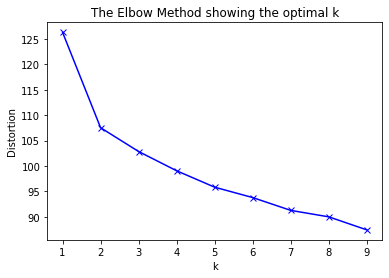

In [181]:
# determine k using elbow method
from scipy.spatial.distance import cdist
from sklearn import metrics

#ts_df is cumulative by the day
X = (np.array(df_matric_subject_marks.fillna(0)))
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    #try different clusterings and calculate distortions
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 

In [203]:
from sklearn.cluster import KMeans
from sklearn import cluster

n_clusters = 10
np.random.seed(0)
# reshapes from (768,1024) to (786432,1)
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(df_matric_subject_marks.iloc[:,:-1].fillna(0))
k_means.labels_

array([3, 4, 7, ..., 3, 1, 1])

In [204]:
df_matric_subject_marks_labels = df_matric_subject_marks.copy()
df_matric_subject_marks_labels['labels'] = k_means.labels_

In [208]:
from pandasql import sqldf
from pandasql import *
pysqldf = lambda q: sqldf(q, globals())


In [206]:
def sqlCommands():
    return pysqldf(
        '''
        SELECT * FROM df_matric_subject_marks
        '''  
    )

In [217]:
import plotly.express as px
fig = px.scatter(df_matric_subject_marks_labels.iloc[:100,:].fillna(0), x="MATNSC", y="PSCNSC", size="MeanAverage", color="labels",
           hover_name=None, log_x=True, size_max=20)
fig.show()

In [232]:
df_matric_2 = dfSubjectMarksLabels.loc[:,:'IXCNSC']
df_matric_2['MeanAverage'] = df_matric_2.mean(axis = 1)
df_matric_varsity_2 = pd.concat([df_matric_2, dfSubjectMarksLabels.loc[:,'IXCNSC':]], axis = 1)

In [248]:
px.scatter(data_frame = df_matric_varsity_2.fillna(0)[df_matric_varsity_2.fillna(0)['MeanAverage'] >50], x="MeanAverage", y="MATH3004", color="MeanAverage",
           hover_name=None, log_x=False, size_max=6000)